# **AP157 Machine Learning Lab Assignment**
## Module A.2: Classification -- Morphological Classification of Galaxies using Decision Trees

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1, 2, and 3 are worth 20, 40, and 40 points, respectively).

_Credits_: This assignment is based on the Week 6 module of the Coursera course "Data-driven Astronomy", "Exploring machine learning classification" ([link](https://www.coursera.org/learn/data-driven-astronomy/home/welcome))

### Student Information

_Full Name (Last Name, First Name)_: Manuel, Johann Jude\
_Student No._: 2021-08318\
_Section_: TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: 05/03/24 11:30 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** JOHANN JUDE TAN MANUEL

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/40
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For this assignment, you will work with galaxy data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the binary file ```galaxy_catalogue.npy``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```galaxy_catalogue.npy``` from your Google Drive folder.

Mount the Google Drive where you saved the .npy file.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [ ]:
!ls drive/My\ Drive

Define the directory path to the location of the file, i.e. if it is in a
folder named "AP157" under My Drive, then the file path will be "/content/drive/My Drive/AP157". Change the string variable in the code cell below, as needed:

In [3]:
file_path = "/content/drive/My Drive/AP157/"

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.





In [4]:
import numpy as np

data = np.load(file_path + 'galaxy_catalogue.npy')

Print out the first couple of rows. Note that the columns are: $u-g$, $g-r$, $r-i$, $i-z$, eccentricity, $m_u$, $m_g$, $m_r$, $m_i$, $m_z$, $R_{50,u}$, $R_{50,r}$, $R_{50,z}$, $R_{90,u}$, $R_{90,r}$, $R_{90,z}$, and class.

In [5]:
data[:2]

array([(1.85765, 0.67158, 0.4231 , 0.3061 , 0.5854284, 2.251946, 2.339849, 2.380652, 2.359738, 2.395528, 3.095123, 3.818919, 3.82623 , 5.174814, 8.263009, 11.47734 , 'merger'),
       (1.74259, 0.86085, 0.44927, 0.28851, 0.7498125, 2.031566, 2.084156, 2.092272, 2.124075, 2.133154, 1.430436, 1.422533, 1.385727, 3.732712, 3.416921,  3.330347, 'merger')],
      dtype=[('u-g', '<f8'), ('g-r', '<f8'), ('r-i', '<f8'), ('i-z', '<f8'), ('ecc', '<f8'), ('m4_u', '<f8'), ('m4_g', '<f8'), ('m4_r', '<f8'), ('m4_i', '<f8'), ('m4_z', '<f8'), ('petroR50_u', '<f8'), ('petroR50_r', '<f8'), ('petroR50_z', '<f8'), ('petroR90_u', '<f8'), ('petroR90_r', '<f8'), ('petroR90_z', '<f8'), ('class', '<U20')])

#### PART 1 - Get features and targets *(20 pts.)*

Write a function ```get_features_targets``` that splits the dataset into input features and their corresponding targets. In our case, the inputs are the 4 galaxy colors ($u-g$, $g-r$, $r-i$, and $i-z$), eccentricity, $ugriz$ magnitudes, and concentrations $R_{50}/R_{90}$ in the $u$, $r$, and $z$ bands. The targets are the classes.

Here's an example of how your function should work:
```
>>> features, targets = get_features_targets(data)
>>> print("Features shape:", features.shape
>>> print("Targets shape:", targets.shape)
Features shape: (780, 13)
Targets shape: (780,)
```

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [25]:
def get_feature_targets(data):
  df = pd.DataFrame(data) # Create pandas dataframe to manipulate dataset

  # Create new features from existing
  df["R50/R90_u"] = df["petroR50_u"] / df["petroR90_u"]
  df["R50/R90_r"] = df["petroR50_r"] / df["petroR90_r"]
  df["R50/R90_z"] = df["petroR50_z"] / df["petroR90_z"]

  targets = df[["class"]]   # Create a separate df for target column

  # Drop unneeded features from dataset including target
  features = df.drop(["petroR50_u", "petroR90_u", "petroR50_r", "petroR90_r", "petroR50_z", "petroR90_z", "class"], axis=1)

  return targets, features, df

targets, features, df = get_feature_targets(data)
features.head()

,u-g,g-r,r-i,i-z,ecc,m4_u,m4_g,m4_r,m4_i,m4_z,R50/R90_u,R50/R90_r,R50/R90_z
0,1.85765,0.67158,0.42310,0.30610,0.585428,2.251946,2.339849,2.380652,2.359738,2.395528,0.598113,0.462170,0.333373
1,1.74259,0.86085,0.44927,0.28851,0.749812,2.031566,2.084156,2.092272,2.124075,2.133154,0.383216,0.416320,0.416091
2,2.10697,0.96710,0.56810,0.33747,0.630089,1.992887,2.450746,2.473116,2.465324,2.438683,0.340249,0.433751,0.307428
3,1.22840,0.60446,0.39049,0.28913,0.668999,2.056115,2.182252,2.309510,2.391414,2.472397,0.378602,0.333005,0.314361
4,1.80792,0.78124,0.45528,0.35067,0.500170,2.259167,2.194723,2.264567,2.334713,2.352568,0.353735,0.322113,0.339692


In [23]:
targets.head()

,class
0,merger
1,merger
2,merger
3,merger
4,merger


In [27]:
print(features.shape)
print(targets.shape)

(780, 13)
(780, 1)


#### PART 2 - Train and run a decision tree model *(40 pts.)*

Write a function ```predict_class``` that will train and validate a model that predicts a galaxy's class from its photometric properties. In particular, it should do the following:
1. Split the dataset into a training and test dataset using an 80:20 split.
2. Train the input model using the training dataset features and targets.
3. Return two arrays-- the predicted and actual class of the test galaxies.

Here's an example of how your function should work:
```
import numpy as np
from sklearn.tree import DecisionTreeClassifier

data = np.load(file_path + 'galaxy_catalogue.npy')
predicted_class, actual_class = predict_class(data)

for i in np.arange(3):
   print("%d, %s, %s" & (i, predicted_class[i], actual_class[i]))
```

In [8]:
from sklearn.tree import DecisionTreeClassifier

"""
The below function predict_class(features, targets) works, but for
practical purposes it is worse to define it as a function considering
there are a lot of useful sklearn methods available.
It's unlikely one only needs the predicted_class and actual_class in analyzing
the model, so I will not use the predict_class function.

def predict_class(features, targets):
  x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

  # Create and train decision tree classifier
  tree_clf = DecisionTreeClassifier()
  tree_clf.fit(x_train, y_train)

  predicted_class = tree_clf.predict(x_test)
  actual_class = y_test["class"].to_numpy()

  return predicted_class, actual_class

predicted_class, actual_class = predict_class(features, targets)


for i in np.arange(3):
  print("%d, %s, %s" % (i, predicted_class[i], actual_class[i]))

"""

'\nThe below function predict_class(features, targets) works, but for \npractical purposes it is worse to define it as a function considering\nthere are a lot of useful sklearn methods available. \nIt\'s unlikely one only needs the predicted_class and actual_class in analyzing\nthe model, so I will not use the predict_class function.\n\ndef predict_class(features, targets):\n  x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)\n\n  # Create and train decision tree classifier\n  tree_clf = DecisionTreeClassifier()\n  tree_clf.fit(x_train, y_train)    \n\n  predicted_class = tree_clf.predict(x_test)     \n  actual_class = y_test["class"].to_numpy()   \n\n  return predicted_class, actual_class\n\npredicted_class, actual_class = predict_class(features, targets)\n\n\nfor i in np.arange(3):\n  print("%d, %s, %s" % (i, predicted_class[i], actual_class[i]))\n\n'

In [9]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)    # Split dataset

tree_clf = DecisionTreeClassifier()   # Create classifier
tree_clf.fit(x_train, y_train)

# Apply decision tree classifier
predicted_class = tree_clf.predict(x_test)
actual = y_test.copy()
actual_class = actual["class"].to_numpy()

for i in np.arange(3):
  print("%d, %s, %s" % (i, predicted_class[i], actual_class[i]))

0, spiral, spiral
1, spiral, spiral
2, merger, spiral


#### PART 3 - Confusion matrix and accuracy *(40 pts.)*

1. Get the confusion matrix for your test dataset-- this is a 3 x 3 matrix with the counts for each combination of actual and predicted class. *(25 pts.)*

2. Get the test accuracy of your decision tree classifer, defined as the number of correct predictions divided by the total number of predictions. *(15 pts.)*

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(actual_class, predicted_class)  # Create confusion matrix

print(cm)
print(f"Accuracy: {np.sum(np.diag(cm)) / np.sum(cm) * 100}%" )

[[50  5  0]
 [ 4 36  9]
 [ 1 17 34]]
Accuracy: 76.92307692307693%


## Why use a confusion matrix?

Vague "accuracy" is not a good metric for measuring the performance of a classifier compared to a regression model, for example. To show this, we can write the following:

In [11]:
from sklearn.base import BaseEstimator

y_train_merger = (y_train.to_numpy() == "merger")
y_test_merger = (y_test.to_numpy() == "merger")

class NotMerger(BaseEstimator):
  def fit(self, X, y=None):
    return self
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

For discussion, we want a binary dataset to train a model which can determine whether a galaxy is a "merger" or not.
To do this, we modified the dataset to consist of only "True" and "False" values pertaining to a merger and other types respectively.

Afterwards, we created a "null" classifier that returns "False" for all data it makes predictions on.

In [12]:
from sklearn.model_selection import cross_val_score

not_merger_clf = NotMerger()
cross_val_score(not_merger_clf, x_train, y_train_merger, cv=3, scoring="accuracy")

array([0.625     , 0.69230769, 0.66826923])

Above we trained the model and asked it to predict whether a galaxy is a merger or not and achieved a $62$% accuracy on the low end, and almost $70$% on the higher end. Indeed, the number of mergers in the dataset is $1/3$, so a crude binary model as above can achieve an over $60$% accuracy in the dataset (the difference is due to the cross-validation splitting). We expect that such a model can achieve even higher "accuracies" for binary classifiers with more samples and classification types.

In [13]:
targets["class"].value_counts()

merger        260
elliptical    260
spiral        260
Name: class, dtype: int64

To address such pecularities, we use a confusion matrix to determine what types are often misclassified as seen below, thus providing a better metric for a classifier model.

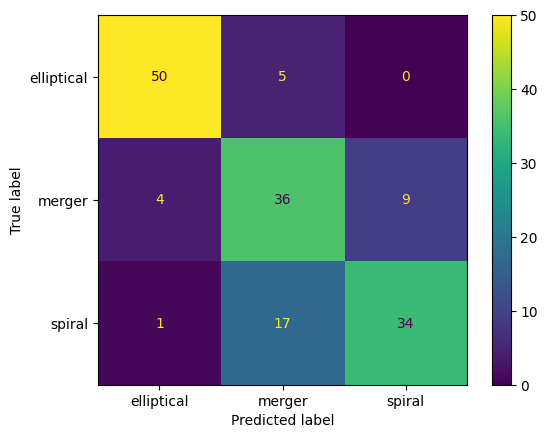

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=tree_clf.classes_, )
disp.plot()

We can get a more "complete" confusion matrix by using cross validation. The sklearn module has cross_val_predict to split and train the dataset with a specified train fold and applying it to a different (unseen) test split each time. Let's try 5 folds.


Text(0.5, 1.0, 'CM Normalized by Row')

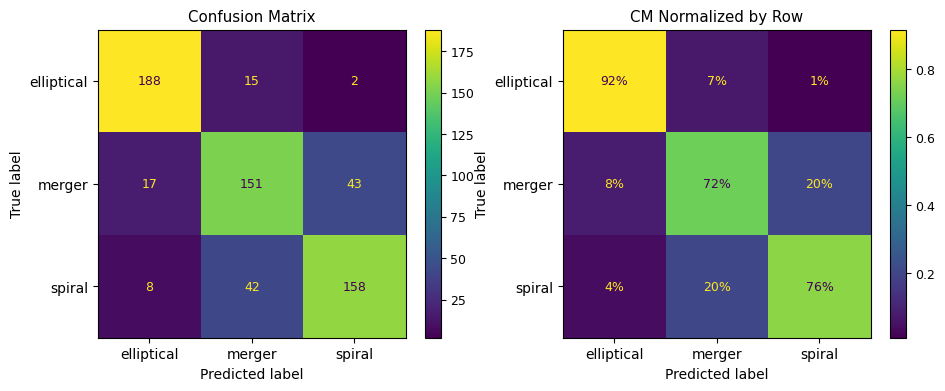

In [15]:
from sklearn.model_selection import cross_val_predict
from matplotlib import pyplot as plt

y_train_pred = cross_val_predict(tree_clf, x_train, y_train, cv=5)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4))
plt.rc("font", size=9)

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=ax[0])
ax[0].set_title("Confusion Matrix")

# Display in terms of percentage of total
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true",
                                        values_format=".0%", ax=ax[1])
ax[1].set_title("CM Normalized by Row")

## Analyzing errors

In the above confusion matrix, we observe that elliptical galaxies are almost never mistaken for a spiral and vice versa. On the other hand, elliptical galaxies are sometimes mistaken for mergers, around a fifth of all spiral galaxies were mistaken to be a merger (and almost half for the non-cross-validated confusion matrix). To see why this is, we can inspect the features of misclassified spiral data and compare it with the features of true spirals and mergers.

In [16]:
# Create dataframe of misclassified data

misclassified = np.where(actual_class != predicted_class)

misclassified_df = x_test.iloc[misclassified]
misclassified_df["class"] = y_test.iloc[misclassified]
misclassified_df["misclass"] = predicted_class[actual_class != predicted_class]   # Create new column for misclassified data

spiral_misclass = misclassified_df.iloc[np.where(misclassified_df["class"] == "spiral")]
merger_misclass = misclassified_df.iloc[np.where(misclassified_df["class"] == "merger")]

spiral_misclass.loc[[633, 696]]

<ipython-input-16-f0ccc2ea415d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified_df["class"] = y_test.iloc[misclassified]
<ipython-input-16-f0ccc2ea415d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified_df["misclass"] = predicted_class[actual_class != predicted_class]   # Create new column for misclassified data


,u-g,g-r,r-i,i-z,ecc,m4_u,m4_g,m4_r,m4_i,m4_z,R50/R90_u,R50/R90_r,R50/R90_z,class,misclass
633,10.62404,0.65843,0.36146,0.27085,0.898982,-9999.000000,2.436430,2.436791,2.443566,2.435063,1.000000,0.368996,0.347411,spiral,elliptical
696,0.83962,0.59136,0.36840,0.60902,0.971008,1.937477,1.930544,1.952358,1.954323,-9999.000000,0.558178,0.374572,0.412992,spiral,merger


Notice the m4_u and m4_z columns. These misclassified data seem to have problematic values for these features which may be the cause for their misclassification. Before plotting the features for comparison, we want to drop these to not interfere with the histogram.

In [17]:
spiral_misclass = spiral_misclass.drop(index=[696, 633])    # Remove outlier data for plotting

In [18]:
# Create df of correctly classified data

classified = np.where(actual_class == predicted_class)

classified_df = x_test.iloc[classified]
classified_df["class"] = y_test.iloc[classified]

spiral_class = classified_df.iloc[np.where(classified_df["class"] == "spiral")]
merger_class = classified_df.iloc[np.where(classified_df["class"] == "merger")]

spiral_class.head()

<ipython-input-18-df84b406df4a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classified_df["class"] = y_test.iloc[classified]


,u-g,g-r,r-i,i-z,ecc,m4_u,m4_g,m4_r,m4_i,m4_z,R50/R90_u,R50/R90_r,R50/R90_z,class
595,1.23617,0.50507,0.26502,0.21291,0.816855,2.198690,2.207609,2.334752,2.350597,2.260829,0.400660,0.507431,0.535571,spiral
587,1.44921,0.68476,0.35387,0.26944,0.707266,2.213931,2.387288,2.553287,2.574248,2.599853,0.571356,0.448379,0.396563,spiral
644,1.18627,0.46909,0.30339,0.20263,0.878094,2.298472,2.313071,2.365577,2.387007,2.383433,0.543828,0.463087,0.487807,spiral
527,1.62905,0.70261,0.40292,0.24823,0.574067,1.883278,2.149960,2.299755,2.385038,2.438607,0.592258,0.470469,0.422989,spiral
582,1.22819,0.51520,0.27293,0.21718,0.883494,2.183716,2.335077,2.451626,2.475602,2.504146,0.549757,0.473813,0.477000,spiral


In [19]:
""" This block of code plots all features of misclassified spirals against true spirals and mergers.
    I ran it for obervation but plot can be quite long. """

"""
fig, ax = plt.subplots(13, 3, figsize=(14, 32))

col_name = ["True Spiral", "Misclassified Spiral to Merger", "True Merger"]

for i, column_name in enumerate(classified_df.drop("class", axis=1)):
  ax[i, 0].hist(spiral_class[[column_name]])
  ax[i, 0].set_title(column_name, fontsize=12)

  ax[i, 1].hist(spiral_misclass[[column_name]])
  ax[i, 1].set_title(column_name, fontsize=12)

  ax[i, 2].hist(merger_class[[column_name]])
  ax[i, 2].set_title(column_name, fontsize=12)

for ax, col in zip(ax[0], col_name):
    ax.set_title(col)

fig.tight_layout()
"""

'\nfig, ax = plt.subplots(13, 3, figsize=(14, 32))\n\ncol_name = ["True Spiral", "Misclassified Spiral to Merger", "True Merger"]\n\nfor i, column_name in enumerate(classified_df.drop("class", axis=1)):\n  ax[i, 0].hist(spiral_class[[column_name]])\n  ax[i, 0].set_title(column_name, fontsize=12)\n\n  ax[i, 1].hist(spiral_misclass[[column_name]])\n  ax[i, 1].set_title(column_name, fontsize=12)\n\n  ax[i, 2].hist(merger_class[[column_name]])\n  ax[i, 2].set_title(column_name, fontsize=12)\n\nfor ax, col in zip(ax[0], col_name):\n    ax.set_title(col)\n\nfig.tight_layout()\n'

The above code plots the features of misclassified spirals against the features of true spirals and mergers. We can better know what to look for by plotting the feature importances of the classifier. Sklearn has a feature_importances_ method which shows how much a particular feature affects classification.

Text(0.5, 0, 'Normalized feature importance')

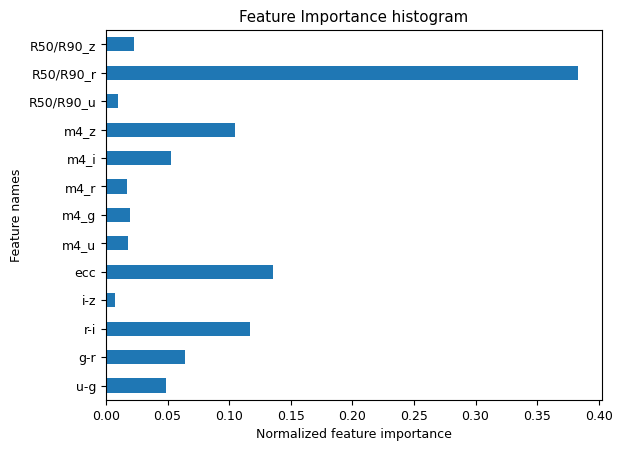

In [20]:
(pd.Series(tree_clf.feature_importances_, index=tree_clf.feature_names_in_)
   .plot(kind='barh'))
plt.title("Feature Importance histogram")
plt.ylabel("Feature names")
plt.xlabel("Normalized feature importance")

According to the plot above, the R50/R90_r feature is most important in classifying the type of galaxy followed by the eccentricity. We can now focus on analyzing these particular features of the misclassified galaxies in comparison to true values.

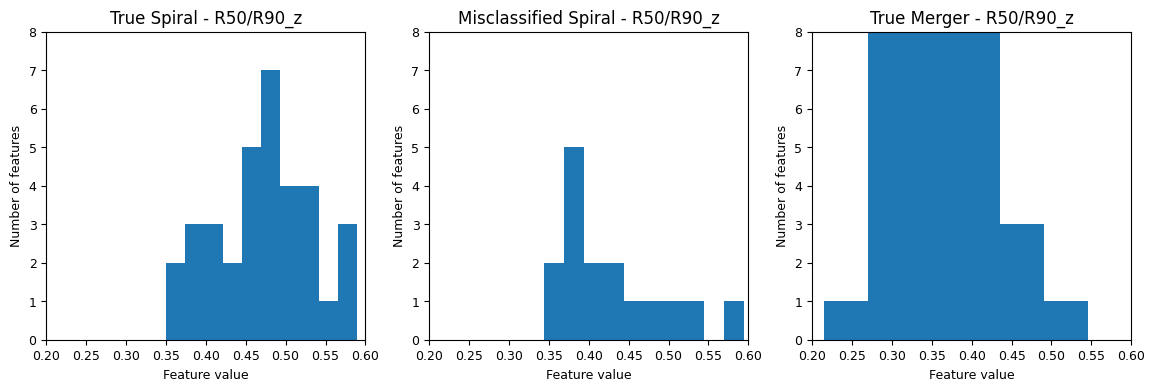

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))

col_name = ["True Spiral", "Misclassified Spiral to Merger", "True Merger"]

ax[0].hist(spiral_class[["R50/R90_z"]])
ax[0].set_title("True Spiral - R50/R90_z", fontsize=12)

ax[1].hist(spiral_misclass[["R50/R90_z"]])
ax[1].set_title("Misclassified Spiral - R50/R90_z", fontsize=12)

ax[2].hist(merger_class[["R50/R90_z"]])
ax[2].set_title("True Merger - R50/R90_z", fontsize=12)

for i in range(0, 3):
  ax[i].set_xlabel("Feature value")
  ax[i].set_ylabel("Number of features")
  ax[i].set_xlim(0.20, 0.60)
  ax[i].set_ylim(0, 8)

We observe above that the true spiral has most of its feature values for the R50/R90_z component in the range between $0.45$ to below $0.55$. On the other hand, the true merger has feature values ranging from below $0.30$ to around $0.40$. The misclassified spiral has most R50/R90_z component values sitting at around $0.35$ to below $0.45$. This is closer to the range provided by the true merger, which may have caused the misclassification.

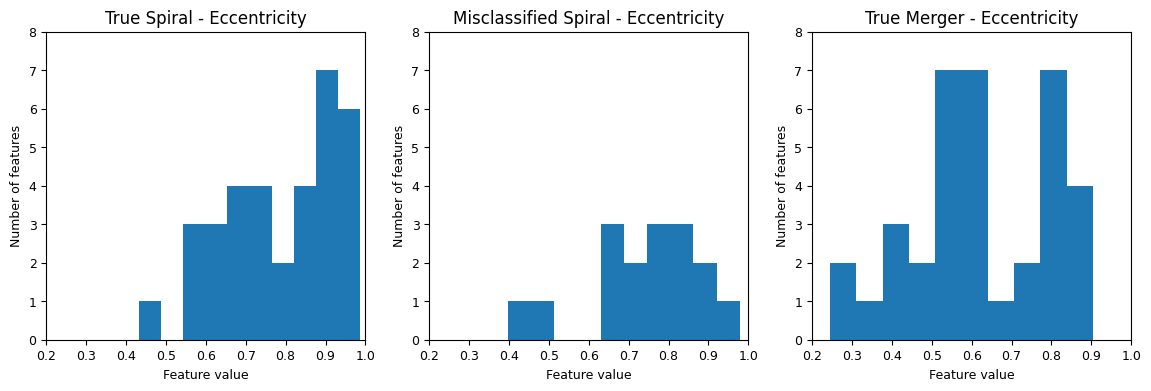

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))

col_name = ["True Spiral", "Misclassified Spiral to Merger", "True Merger"]

ax[0].hist(spiral_class[["ecc"]])
ax[0].set_title("True Spiral - Eccentricity", fontsize=12)

ax[1].hist(spiral_misclass[["ecc"]])
ax[1].set_title("Misclassified Spiral - Eccentricity", fontsize=12)

ax[2].hist(merger_class[["ecc"]])
ax[2].set_title("True Merger - Eccentricity", fontsize=12)

for i in range(0, 3):
  ax[i].set_xlabel("Feature value")
  ax[i].set_ylabel("Number of features")
  ax[i].set_xlim(0.20, 1)
  ax[i].set_ylim(0, 8)

It is more difficult to make conclusions about the eccentricity due to the fairly even spread of values of the misclassified galaxies. Still, this ambiguity may have caused the misclassification. The peak eccentricity value for the true merger is $0.8$, while the value of $0.8$ is a dip for the true spiral eccentricity. The misclassified spiral meanwhile has one of the peak values at $0.8$, which may have caused those galaxies to tend towards a merger classification. On the other hand, the true merger also has a peak between the values $0.5$ and $0.6$, while the misclassified spiral has (almost, depending on seed as well) no galaxies with those values, similar to the true spiral. For these cases, the decision tree may have relied on other features to classify the galaxies.